In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split

In [ ]:
# Data Frame Create
df = pd.read_csv('/content/drive/MyDrive/serieson.csv', encoding='cp949', header=None)
df

,0
0,"이른 새벽, 미국 뉴저지의 한 세탁소에서 총성이 울려 퍼진다. 살인 사건은 세간을 ..."
1,“여러분 믿으셔야 합니다.” 화신교 교주 신택과 함께 탈북한 명선. 두 사람은 한 ...
2,살인자들의 수배에 걸린 현상금을 노리는 무인들과 온갖 범법자들로 인해 혼란한 중국의...
3,1930년 군수공장으로 그 지역사회 경제를 이끌어 가는 한 도시에서 의문의 사건이 ...
4,중고거래로 범죄의 표적이 된 ‘수현’의 일상 속에서 벌어지는 서스펜스를 담은 스릴러
...,...
12824,"어린 소녀 눈앞에 펼쳐진 어느 여름날의 짧은 이야기. 이른 여름 아침, 버스를 타고..."
12825,5년차 무명 개그맨 용기(이정재 분)는 운이 없는 건지 실력이 없는 건지 성공의 길...
12826,유곡 초등학교로 교환 수업을 온 서울 초등학교 아이들과 인솔자 정유미 선생님(최지...
12827,"존 웨인보다는 험프리 보가트에게 매력을 느끼고, 딸에게 밍크코트를 사달라고 조르고,..."


In [ ]:
input_list = []
labels_list = []
for i in range(len(df)):
    row = re.sub('\.{2,}', '.', df.iloc[i][0])
    row = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ, .0-9!?…]', '', row)
    s_list = re.split('(?<=[.?!…])\s', row)
    filtered_list = [text for text in s_list if not re.match('^[ㄱ-ㅎ\s\.,0-9]*$', text) and len(text) >= 20]
    if len(filtered_list) > 1:
        for i in range(len(filtered_list)):
            if i < len(filtered_list) - 2:
                input_list.append(filtered_list[i])
                labels_list.append(filtered_list[i + 1])

# 데이터프레임 생성
new_df = pd.DataFrame({'input': input_list, 'labels': labels_list})
display(new_df)

,input,labels
0,"이른 새벽, 미국 뉴저지의 한 세탁소에서 총성이 울려 퍼진다.",살인 사건은 세간을 떠들썩하게 하지만 범인이 잡히지 않은 채 서서히 잊혀진다.
1,살인 사건은 세간을 떠들썩하게 하지만 범인이 잡히지 않은 채 서서히 잊혀진다.,"7년 후, 행복했던 가족의 과거를 추억하던 두 남자는 술을 마시던 중 숨겨진 비밀을..."
2,화신교 교주 신택과 함께 탈북한 명선.,두 사람은 한 시골 마을에 정착하게 된다.
3,살인자들의 수배에 걸린 현상금을 노리는 무인들과 온갖 범법자들로 인해 혼란한 중국의...,그 절은 창백한 얼굴을 한 미모의 귀신이 남자들을 유혹한 뒤 살해하는 무서운 곳이나...
4,그 절은 창백한 얼굴을 한 미모의 귀신이 남자들을 유혹한 뒤 살해하는 무서운 곳이나...,"섭소천이라는 그 귀신은 대가집의 딸로, 간신들의 모함으로 일가족이 죽음을 당해 나무..."
...,...,...
47189,하지만 철수는 그녀가 사랑을 모른다고 생각한다.,그가 생각하는 사랑은 체온을 나누는 현실이기 때문이다.춘희가 매일 밤 무엇인가를 끄...
47190,그가 생각하는 사랑은 체온을 나누는 현실이기 때문이다.춘희가 매일 밤 무엇인가를 끄...,그녀가 누군가를 혼자 사랑하고 있다는 것을 알아챈 철수는 그녀의 사랑방식이 탐탁지 않다.
47191,그녀가 누군가를 혼자 사랑하고 있다는 것을 알아챈 철수는 그녀의 사랑방식이 탐탁지 않다.,"그녀의 사랑은 기다림만 있을 뿐, 어떤 진전도 없다."
47192,"그녀의 사랑은 기다림만 있을 뿐, 어떤 진전도 없다.",철수는 그녀의 글 속으로 들어가 그녀의 사랑을 바꾸려 한다.


In [ ]:
print(new_df['input'].isnull().sum())  # 0
print(new_df['labels'].isnull().sum())  # 0

0
0


In [ ]:
import torch
from transformers import T5TokenizerFast, T5ForConditionalGeneration, AdamW
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset

# 디바이스 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 토크나이저와 모델 로드
model_name = '/content/drive/MyDrive/my_ws/project/Final/pko-t5-base'  # 구글드라이브
# model_name = "paust/pko-t5-base"  # 직접다운로드

save_path = "/content/drive/MyDrive/model_save"

tokenizer = T5TokenizerFast.from_pretrained(model_name)
# tokenizer = T5TokenizerFast.from_pretrained(load_path)

model = T5ForConditionalGeneration.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(load_path)
model.to(device)

Using device: cpu


In [ ]:
# 데이터 로드 및 전처리
# 'input'과 'output' 열의 모든 문장을 토큰화
input_token = new_df['input'].apply(lambda x: tokenizer.tokenize(x))
labels_token = new_df['labels'].apply(lambda x: tokenizer.tokenize(x))

# 각 문장의 토큰 개수를 확인
input_lengths = input_token.apply(len)
labels_lengths = labels_token.apply(len)

# 'input'과 'output'의 최대 토큰 개수를 확인
max_input_length = input_lengths.max()
max_labels_length = labels_lengths.max()

print(f"Max input length: {max_input_length}")
print(f"Max labels length: {max_labels_length}")

Max input length: 286
Max labels length: 286


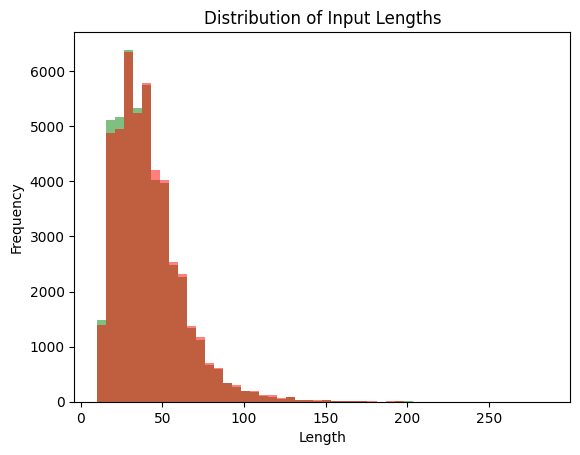

In [ ]:
# 토큰 길이 빈도수 확인
plt.hist(input_lengths, bins=50, alpha=0.5, color='g')
plt.hist(labels_lengths, bins=50, alpha=0.5, color='r')
plt.title('Distribution of Input Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
max_length = 128
new_df = new_df[(input_lengths <= max_length) & (labels_lengths <= max_length)]
new_df.shape
df = new_df

In [ ]:
# 데이터셋 클래스 정의
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        questions = self.data.iloc[idx]['input']
        answers = self.data.iloc[idx]['labels']

        # 토큰 수를 max_length에 맞춰서 자르거나 패딩
        inputs = self.tokenizer(questions, max_length=self.max_length, truncation=True, padding='max_length', return_tensors='pt')
        labels = self.tokenizer(answers, max_length=self.max_length, truncation=True, padding='max_length', return_tensors='pt')

        return {
            'input_ids': inputs.input_ids[0],
            'labels': labels.input_ids[0]
        }

In [ ]:
# tqdm setting
batch_size = 16
dataset = CustomDataset(df, tokenizer)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 학습 설정
optimizer = AdamW(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

num_epochs = 4

# 학습 루프에서 데이터 로더 사용
total_steps = 0
for epoch in range(num_epochs):
    for batch in tqdm(data_loader, total=len(data_loader)):
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        # 모델 학습
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss

        # 역전파 및 가중치 업데이트
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_steps += 1

        # # 0.5 에폭마다 체크포인트 저장
        # if total_steps % int(len(dataset) / (batch_size * 2)) == 0:
        #     checkpoint_dir = f"{save_path}/checkpoint_{total_steps}"
        #     model.save_pretrained(checkpoint_dir)

# 학습이 완료된 모델 저장
model.save_pretrained(save_path)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
 22%|██▏       | 2612/11672 [13:54<48:03,  3.14it/s]

In [ ]:
user_input = "군 복무를 마치고 복학한 만섭은 학교에 족구장이 사라졌다는 걸 알게 된다."

result_list = []
prompt = f"{user_input}"
input_ids = tokenizer(prompt, return_tensors='pt').input_ids.to(device)

for i in range(100):

    logits = model.generate(
            input_ids,
            max_length=1024,
            temperature=0.5,
            no_repeat_ngram_size=2,
            do_sample=True,
            num_return_sequences=1,
        )
    result_list.append(tokenizer.batch_decode(logits, skip_special_tokens=True)[0])

for text in result_list:
    print(text)

# 리스트를 데이터프레임으로 변환
df_result = pd.DataFrame(result_list, columns=['Text'])

# 데이터프레임을 CSV 파일로 저장
df_result.to_csv('/content/drive/MyDrive/my_ws/project/Final/csv/result-list3.csv', index=False, encoding='utf-8-sig')


In [ ]:
# user_input = "군 복무를 마치고 복학한 만섭은 학교에 족구장이 사라졌다는 걸 알게 된다. 만섭의 군대 생활을 알게 된 도겸과 친구들은 그곳에 족구장이 없어진 걸 알고 경악한다."
# prompt = f"{user_input}"
# input_ids = tokenizer(prompt, return_tensors='pt').input_ids.to(device)

# logits = model.generate(
#             input_ids,
#             max_length=1024,
#             temperature=0.5,
#             no_repeat_ngram_size=2,
#             do_sample=True,
#             num_return_sequences=1,
#         )

# tokenizer.batch_decode(logits, skip_special_tokens=True)[0]